# Visualizing the Kaggle Data

The Kaggle dataset consists of seven year of motor vehicle crash data and assesses them based on a severity metric. Let's first take a look at the years 2019 and 2020.

In [1]:
# Loading modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Kaggle dataset
df_kaggle = pd.read_csv("~/Desktop/US_Accidents_March23.csv")

In [90]:
df_kaggle.columns.tolist()

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

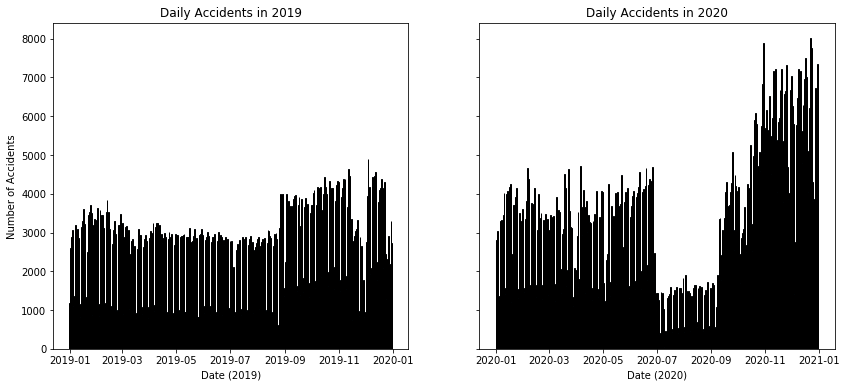

In [3]:
# Convert 'Start_Time' to datetime format
df_kaggle['Start_Time'] = pd.to_datetime(df_kaggle['Start_Time'], errors='coerce')

df_2019 = df_kaggle[(df_kaggle['Start_Time'].dt.year == 2019)]
df_2020 = df_kaggle[(df_kaggle['Start_Time'].dt.year == 2020)]

# Filter for years and copy the results
df_2019 = df_kaggle[df_kaggle['Start_Time'].dt.year == 2019].copy()
df_2020 = df_kaggle[df_kaggle['Start_Time'].dt.year == 2020].copy()

# Now it's safe to add the 'Date' column
df_2019['Date'] = df_2019['Start_Time'].dt.date
df_2020['Date'] = df_2020['Start_Time'].dt.date

# Count the number of accidents per day
accidents_per_day_2019 = df_2019.groupby('Date').size()
accidents_per_day_2020 = df_2020.groupby('Date').size()

# Plot the histogram using a bar chart
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6), sharey = True)
ax[0].bar(accidents_per_day_2019.index, accidents_per_day_2019.values, width=1, edgecolor='black')
ax[1].bar(accidents_per_day_2020.index, accidents_per_day_2020.values, width=1, edgecolor='black')

# Formatting the x-axis with proper date labels
ax[0].set_xlabel('Date (2019)')
ax[0].set_title('Daily Accidents in 2019')
ax[1].set_xlabel('Date (2020)')
ax[1].set_title('Daily Accidents in 2020')
ax[0].set_ylabel('Number of Accidents')

#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In both years, we observe that the number of accidents has dips on certain dates: these occur on the weekends. This is likely due to the fact that less people commute to work on the weekends, thereby lowering the number of motor vehicle crashes. 

Also, both years show a rise in the net number of motor vehicle crashes towards the end of the year, likely due to school starting back up and holiday season travels.

We notice that in 2020, there is a sharp dip in the number of motor vehicle crashes around July. This is due the COVID-19 pandemic, which caused local governments and ordinances to implement stay-at-home orders, limiting the amount of traffic on the streets. 

Since 2020 is not a normal, representative year, like 2019 is, we decide to remove it from our analysis.

In the cell below, we determine the full distribution of accidents, but excluding 2020.

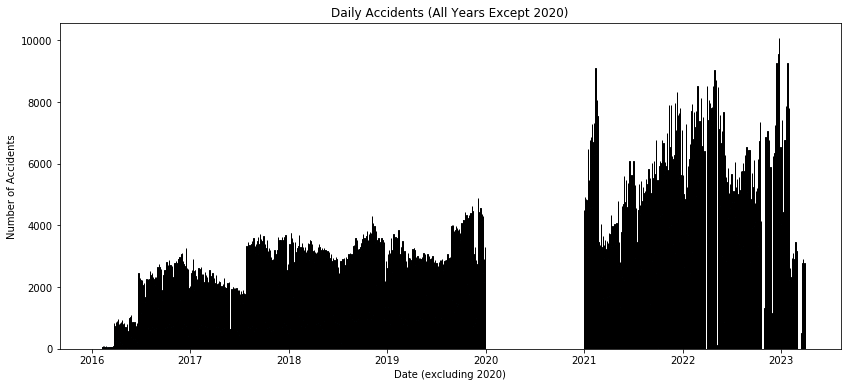

In [4]:
df_all_except_2020 = df_kaggle[df_kaggle['Start_Time'].dt.year != 2020].copy()

# Create a 'Date' column
df_all_except_2020['Date'] = df_all_except_2020['Start_Time'].dt.date

# Count the number of accidents per day
accidents_per_day = df_all_except_2020.groupby('Date').size()

# Plot the histogram
plt.figure(figsize=(14,6))
plt.bar(accidents_per_day.index, accidents_per_day.values, width=1, edgecolor='black')

# Labeling
plt.xlabel('Date (excluding 2020)')
plt.ylabel('Number of Accidents')
plt.title('Daily Accidents (All Years Except 2020)')

# Show plot
plt.show()

# Visualizing our created dataset

Let's now take a look at the dataset we are passing into our ML model. Please take a look at the data processing notebook for a detailed explanation of how this data came to be.

In short, we sort the number of crashes into distinct U.S. census blocks, determined using a dataset from the Environmental Protection Agency (EPA), and weigh the number of crashes according to their severity and population density. The latter of these is to control for census block groups with more people having more crashes, simply due to virtue of their population. For example, a census block group in downtown Manhattan will likely have more accidents than a random location in Wyoming.

Each census block group has features in the EPA dataset. For example, 

In [5]:
# Loading our created dataset
df_full = pd.read_csv('~/Desktop/processed/cbg_no2020_gt3crashes_train.csv')
print(df_full.columns.tolist())

['census_block_group', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050', 'D5AR', 'D5AE', 'D5CR', 'D5CRI', 'D5CE', 'D5CEI', 'D2A_Ranked', 'D2B

That is a lot of features for this dataset, thanks EPA!

As a group, we methodically went through all of these features individually and decided which are most important to our research question of seeing how the built environment influences motor vehicle accident rate and severity. For example, some of these features have little to no direct connection with built evironment (e.g. demographic information).

A full description of this data can be found here: https://www.epa.gov/system/files/documents/2023-10/epa_sld_3.0_technicaldocumentationuserguide_may2021_0.pdf

After trimming this dataset based on actual built environment features, we have the following list of features:
log_crash_per_density, Ac_Unpr, CountHU, Pct_AO0, Pct_AO1, Pct_AO2p, D1A, D1B, D1C, D1D, D3A, D3AAO, D3AMM, D3APO, D3BAO, D3B, D3BMM3, D3BMM4, D3BPO3, D3BPO4, D4B025, D4B050, D5AR, D5CEI, D5CRI, NatWalkInd

In the cells below, we visualize how these features are correlated with each other.

In [6]:
df_reduced = df_full[['Ac_Unpr', 'CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p','D1A',
                      'D1B', 'D1C','D1D','D3A', 'D3AAO', 'D3AMM', 'D3APO','D3BAO', 'D3B', 'D3BMM3', 'D3BMM4', 
                      'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050', 'D5AR', 'D5CEI', 'D5CRI', 'NatWalkInd']]

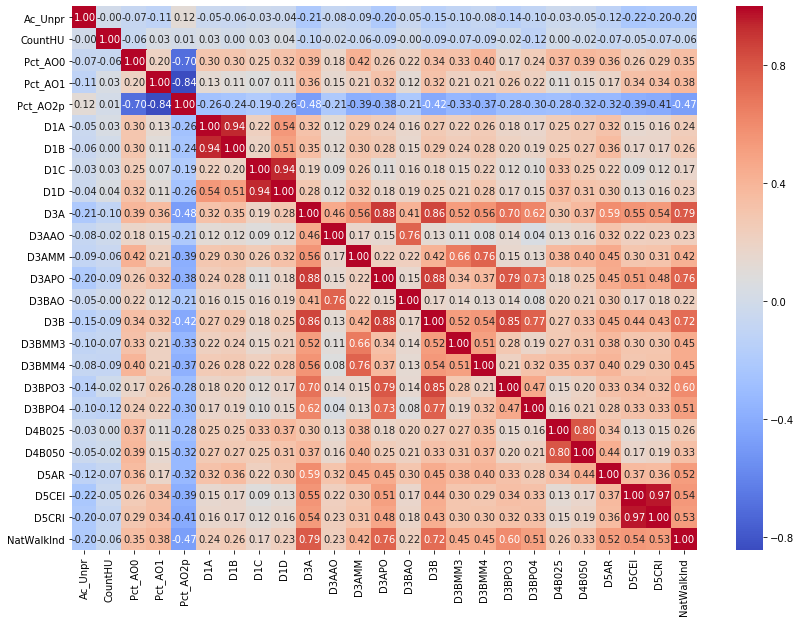

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14,10))
sns.heatmap(df_reduced.corr(), cmap='coolwarm', annot=True, fmt=".2f", )
plt.show()

We have some highly correllated predictors we should throw out: Ac_Unpr, D1A, D1B, D1C, etc. After removing these highly correlated predictors we are left with the final set of predictors: CountHU, Pct_AO0, Pct_AO1, Pct_AO2p, D3A, D3AAO, D3AMM, D3BAO, D3BMM3, D3BMM4, D3BPO3, D3BPO4, D4B025, D4B050, D5AR, D5CRI, NatWalkInd

Since these are the important predictors in our dataset, let's describe what they are:

    CountHU: Total housing units (2018).

    Pct_AO0: Percent of households with 0 cars.

    Pct_AO1: Percent of households with 1 car.

    Pct_AO2p: Percent of households with 2 or more cars.

    D3A: Total road network density (miles per square mile).

    D3AAO: Auto-oriented road density.

    D3AMM: Multi-modal road density.

    D3BAO: Auto-oriented intersections per square mile.

    D3BMM3: Multi-modal intersections with 3 legs per square mile.

    D3BMM4: Multi-modal intersections with 4+ legs per square mile.

    D3BPO3: Pedestrian-oriented intersections with 3 legs per square mile

    D3BPO4: Pedestrian-oriented intersections with 4+ legs per square mile

    D4B025: Percent of CBG employment within ¼ mile of fixed-guideway transit

    D4B050: Percent of CBG employment within ½ mile of fixed-guideway transit

    D5AR: Jobs per working-age population reachable by auto in 45 minutes

    D5CRI: Auto accessibility centrality index

    NatWalkInd: National walkability index
    

Before moving forward,let's take a look at the distributions of some of these features.

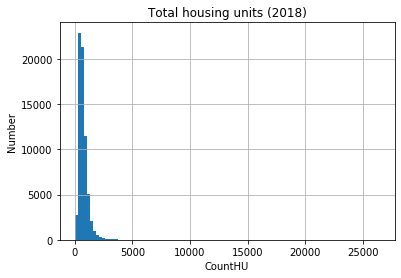

In [8]:
plt.figure()
df_reduced['CountHU'].hist(bins=100)  # You can change the number of bins
plt.title('Total housing units (2018)')
plt.xlabel('CountHU')
plt.ylabel('Number')
plt.show()

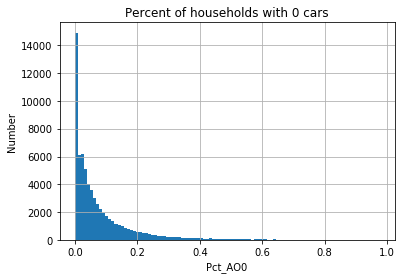

In [10]:
plt.figure()
df_reduced['Pct_AO0'].hist(bins=100)  # You can change the number of bins
plt.title('Percent of households with 0 cars')
plt.xlabel('Pct_AO0')
plt.ylabel('Number')
plt.show()

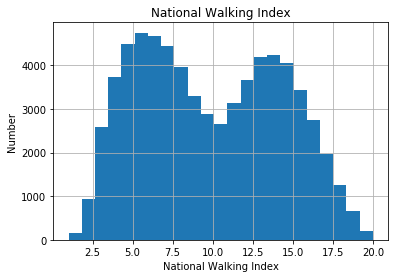

In [12]:
plt.figure()
df_reduced['NatWalkInd'].hist(bins=23)  # You can change the number of bins
plt.title('National Walking Index')
plt.xlabel('National Walking Index')
plt.ylabel('Number')
plt.show()

The National Walking Index is interesting... seems to be almost bimodal, but nothing alarming and nothing we cannot work with. We see that some of these other features are extremelly skewed. When this is the case, we apply a log transformation to bring the tail of the distribution inward. For the case of the Housing Units:

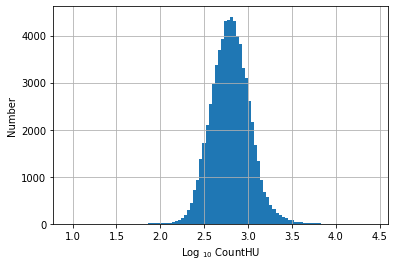

In [13]:
plt.figure()
np.log10(df_reduced['CountHU']).hist(bins=100)  # You can change the number of bins
plt.xlabel(r'Log $_{10}$ CountHU')
plt.ylabel('Number')
plt.show()

This did a pretty good job at putting our data into a Gaussian distribution. Now when we try this on some other features, we cannot apply a log transformation. That is because of zero values entries, as is the case for Pct_AO0 above. For these we apply a log transformation with a small epsilon, or an offset, in order to sent zero-valued entries to a small number.

For Pct_AO0 we choose epsilon = 1e-3.

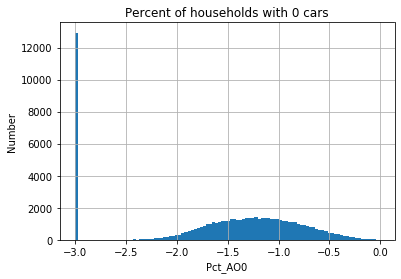

In [14]:
plt.figure()
np.log10(df_reduced['Pct_AO0'] + 1e-3).hist(bins=100)  # You can change the number of bins
plt.title('Percent of households with 0 cars')
plt.xlabel('Pct_AO0')
plt.ylabel('Number')
plt.show()

Due to the nature of the log10 function, all previously valued 0 entries get sent to -3, while the rest of the distribution resembles a Gaussian.

Even the target variable itself that we are trying to predict benefits from a log transformation. Note that in the data set that we have been using, the transformation has already been applied. In order to visualize the difference, we will simple undo it and show it side-by-side with the transformed distribution.

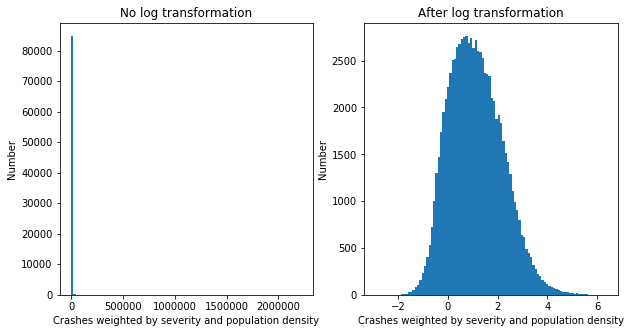

In [15]:
# loading the feature selected dataset that we feed into our ML model with transformed features
df = pd.read_csv('~/Desktop/processed/cbg_no2020_gt3crashes_feature_select_and_transform.csv')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

ax[0].hist(10**(df['log_crash_per_density']), bins = 100)
ax[0].title('No log transformation')
ax[0].set_xlabel('Crashes weighted by severity and population density')
ax[0].set_ylabel('Number')

ax[1].hist(df['log_crash_per_density'], bins = 100)
ax[1].set_title('After log transformation')
ax[1].set_xlabel('Crashes weighted by severity and population density')
ax[1].set_ylabel('Number')

plt.show()

Wow! What a great difference this makes in the overall distribution visually. Let's play around with some of the variables.

Let's go ahead and make a heatmap with correlation again of all the features and the target variable.

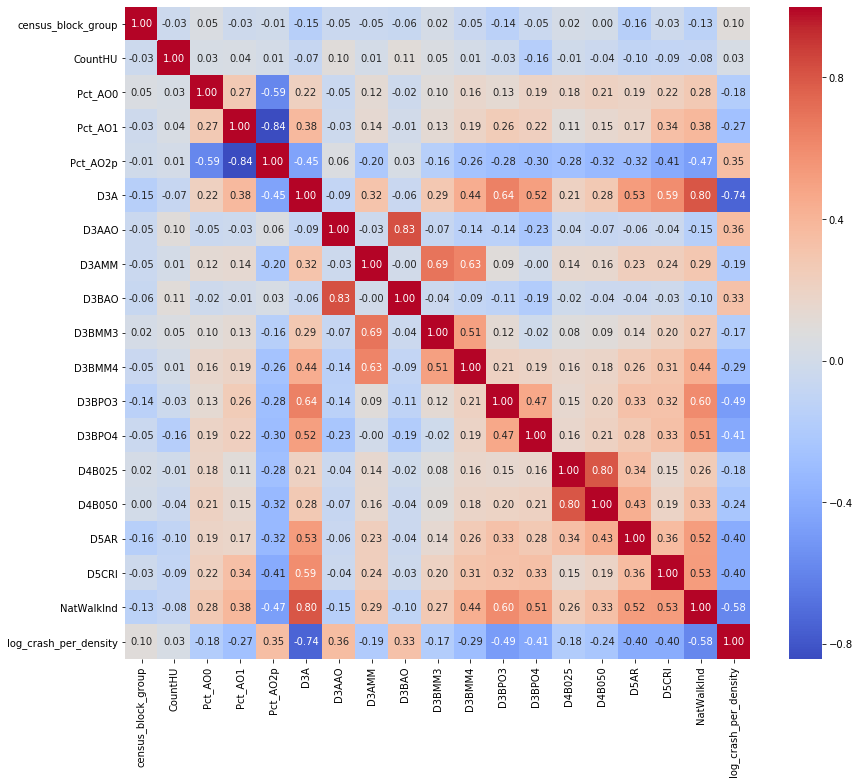

In [19]:
plt.figure(figsize = (14,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", )

plt.show()

It looks like D3A (Total road network density (miles per square mile).) and the National Walking Index are the most correlated features with our dataset. Let's take a quick look at the distributions of those side-by-side.

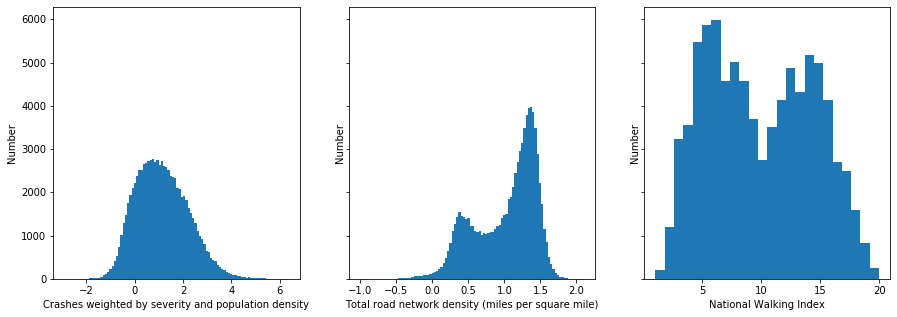

In [94]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5), sharey = True)

ax[0].hist(df['log_crash_per_density'], bins = 100)
ax[0].set_xlabel('Crashes weighted by severity and population density')
ax[0].set_ylabel('Number')

ax[1].hist(df['D3A'], bins = 100)
ax[1].set_xlabel('Total road network density (miles per square mile)')
ax[1].set_ylabel('Number')

ax[2].hist(df['NatWalkInd'], bins = 24)
ax[2].set_xlabel('National Walking Index')
ax[2].set_ylabel('Number')

plt.show()

Let's try to get an even better visualization of how these might be related.

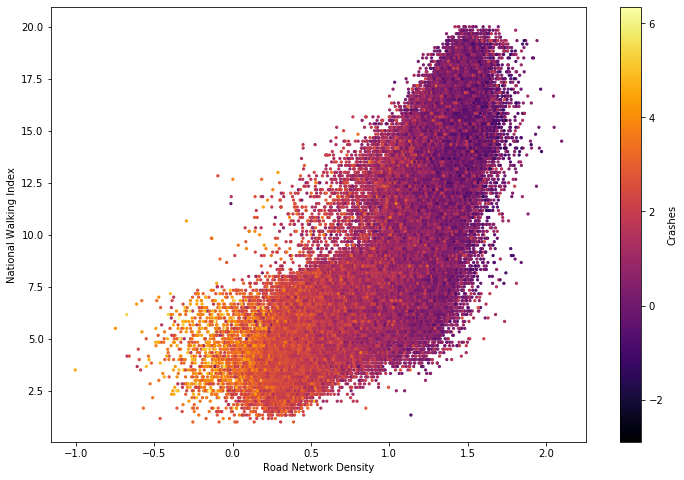

In [97]:
plt.figure(figsize = (12,8))

plt.scatter(df['D3A'], df['NatWalkInd'], c = df['log_crash_per_density'], s = 5, cmap = 'inferno')
plt.colorbar(label='Crashes')
plt.xlabel(r'Road Network Density')
plt.ylabel(r'National Walking Index')
plt.show()

Based on this visualization, we are led to believe that more walkable census block groups lie in areas where road networks are more dense. Also, we are led to believe that worst crashes happen in census block groups where the walkability index is the lowest.

Let's try some other visualizations of this nature. Let's look at the two most important features mentioned in the building of the XGBoost model. It was shown after a feature importance analysis that the most important features are: D3A and D3BAO, which scores of 0.591192 and 0.148210, respectively.

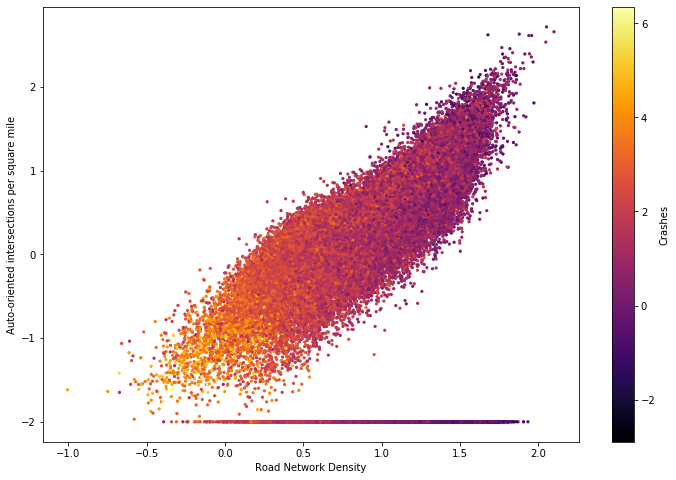

In [25]:
plt.figure(figsize = (12,8))

plt.scatter(df['D3A'], df['D3BAO'], c = df['log_crash_per_density'], s = 5, cmap = 'inferno')
plt.colorbar(label='Crashes')
plt.xlabel(r'Road Network Density')
plt.ylabel(r'Auto-oriented intersections per square mile')
plt.show()

Just to note here, D3BAO (Auto-oriented intersections per square mile), is one of the long-transformed features with an added small epsilon offset, in this case epsilon = 1e-2. This explains the horizontal line of scatter points at the bottom of this figure.

This is also neat: what this says is that there is a direct linear relationship between road network density and auto oriented intersections (at least in log-log space of those two features, since they are both transformed). This should make intuitive sense, as more dense road networks should have more intersections meant for automobiles.

What is interesting here is the color gradient: the census block groups with most dense roads, which also have the most auto-oriented intersections, have the lowest number crashes and they are the least severe.

If you want to decrease the number of motor vehicle crashes and their severity, increase the number of auto-oriented intersections amongst the most dense roads.

Let's play around with the next most important feature accoring to the feature importance next of our XGBoost model: D3BPO3 with a feature importance score of 0.055457.

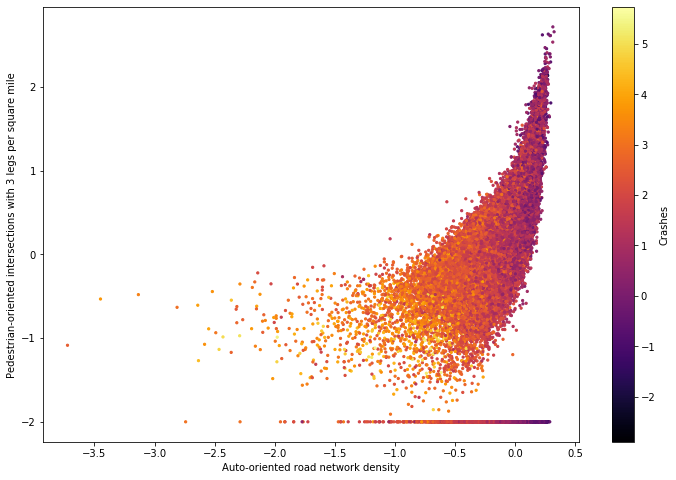

In [125]:
plt.figure(figsize = (12,8))

plt.scatter(np.log10(df['D3A']), df['D3BAO'], c = df['log_crash_per_density'], s = 5, cmap = 'inferno')
plt.colorbar(label='Crashes')
plt.xlabel(r'Auto-oriented road network density')
plt.ylabel(r'Pedestrian-oriented intersections with 3 legs per square mile')

plt.show()

What we see above shows that the number of crashes weighted by their severity is greatly minimized when road networks are made more accessible to pedestrians.